In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.vector_ar.var_model import VAR
from scipy.stats import pearsonr
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('zacs_features1.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,RegionName,ZORI,Year,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_median_value,married_households,housing_units_renter_occupied,nonfamily_households,vacant_housing_units_for_rent,income_10000_29999,...,occupation_natural_resources_construction_maintenance,median_age,total_pop,white_pop,black_pop,hispanic_pop,walked_to_work,commuters_by_public_transportation,commute_10_14_mins,gini_index
0,10025,2883,2014,1438,976900,13337,33778,24576,991,12032,...,1269,39.3,97373,54332,9768,21654,6270,32889,2530,0.5699
1,10025,2895,2014,1438,976900,13337,33778,24576,991,12032,...,1269,39.3,97373,54332,9768,21654,6270,32889,2530,0.5699
2,10025,2907,2014,1438,976900,13337,33778,24576,991,12032,...,1269,39.3,97373,54332,9768,21654,6270,32889,2530,0.5699
3,10025,2920,2014,1438,976900,13337,33778,24576,991,12032,...,1269,39.3,97373,54332,9768,21654,6270,32889,2530,0.5699
4,10025,2933,2014,1438,976900,13337,33778,24576,991,12032,...,1269,39.3,97373,54332,9768,21654,6270,32889,2530,0.5699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155719,60602,2260,2018,3055,454234,420,377,182,1,66,...,0,30.6,1244,788,47,81,362,233,79,0.4940
155720,60602,2266,2018,3055,454234,420,377,182,1,66,...,0,30.6,1244,788,47,81,362,233,79,0.4940
155721,60602,2273,2018,3055,454234,420,377,182,1,66,...,0,30.6,1244,788,47,81,362,233,79,0.4940
155722,60602,2279,2018,3055,454234,420,377,182,1,66,...,0,30.6,1244,788,47,81,362,233,79,0.4940


In [3]:
df.isna().sum()

RegionName                                                     0
ZORI                                                           0
Year                                                           0
renter_occupied_housing_units_paying_cash_median_gross_rent    0
owner_occupied_housing_units_median_value                      0
married_households                                             0
housing_units_renter_occupied                                  0
nonfamily_households                                           0
vacant_housing_units_for_rent                                  0
income_10000_29999                                             0
income_75000_99999                                             0
median_income                                                  0
income_100000_199999                                           0
income_200000_or_more                                          0
million_dollar_housing_units                                   0
dwellings_50_or_more_unit

In [4]:
region = df.RegionName.value_counts().keys()
region

Int64Index([ 2111, 30318, 30062, 75204, 10027, 95822, 28269, 77450, 85382,
            75019,
            ...
            76119, 90067, 95242, 94015, 11550, 55391,  8033, 95111, 32169,
            95130],
           dtype='int64', length=2720)

In [5]:
region = df["RegionName"].unique()

In [8]:
main_df = pd.DataFrame()
count = 1
for reg in region:
    df2 = df[df.RegionName==reg].copy()
    # df2 = df
    start_yr = df2.iloc[0,2]
    
    df2.drop(['RegionName','Year'],axis=1,inplace=True)
    valid_clm = [] #VAR dosent take constanct value
    for c in df2.columns:
        if len(df2[c].value_counts())>1:
            valid_clm.append(c)

    df2 = df2[valid_clm]
    d = datetime.strptime(str(start_yr),'%Y')
    date_index = [d+timedelta(days=30*i) for i in range(len(df2.index))]
    df2.index = pd.DatetimeIndex(date_index)
    df3 = df2[['gini_index','dwellings_50_or_more_units','ZORI','income_10000_29999','occupation_natural_resources_construction_maintenance']]
    model = VAR(endog=df3)
    result= model.fit(maxlags=1)
    
# #     model.predict(3*12)
#     print(result.summary())
    #print(result.score(df3, result.y))
    pred = result.forecast(result.y,steps=3*12)    
    d = df3.index[-1]
    prd = pd.DataFrame()
    time = [d+timedelta(days=30*i) for i in range(3*12)]
    prd['ZORI'] = pred[:,2]
    prd.index = time
    print(reg)
    prd['RegionName'] = reg
    #print(prd.columns)
    #print(prd)
    main_df = pd.concat([main_df,prd])
    #print(main_df)
    #prd.to_csv('prediction.csv')
    #print("prediction.csv generated\n")
    #lr = LinearRegression()
    #lr.fit(df2.drop(['ZORI'],axis=1),df2.ZORI)
    #print("LinearRegression R2 score : ",lr.score(df2.drop(['ZORI'],axis=1),df2.ZORI))
    if count == 100:
        break
    count += 1
    
main_df.to_csv('prediction_final.csv')


/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  warnings.warn('No frequency information was'
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  warnings.warn('No frequency information was'
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information 

10025
60657
10023
77494
60614
77449


/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  warnings.warn('No frequency information was'
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  warnings.warn('No frequency information was'
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information 

10002
77084
79936
60640
11226
78660
94109


/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  warnings.warn('No frequency information was'
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  warnings.warn('No frequency information was'
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information 

10016
37013
60647
11201
11375


/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  warnings.warn('No frequency information was'
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  warnings.warn('No frequency information was'
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information 

90250
78130
37211
10029
10009
77573


/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  warnings.warn('No frequency information was'
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  warnings.warn('No frequency information was'
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for end

60618
77584
10011
20002
10128


/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  warnings.warn('No frequency information was'
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  warnings.warn('No frequency information was'
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information 

28269
78613
77433
30349
79912


/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  warnings.warn('No frequency information was'
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  warnings.warn('No frequency information was'
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information 

75052
94565
11206
73099
90046
20009
77429


/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  warnings.warn('No frequency information was'
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  warnings.warn('No frequency information was'
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for end

78245
77479
60613
30044
10019
63376


/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  warnings.warn('No frequency information was'
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  warnings.warn('No frequency information was'
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information 

10003
28277
60625
30043
11212
10463


/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  warnings.warn('No frequency information was'
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  warnings.warn('No frequency information was'
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information 

60629
11209
30096
11221
7030
98052


/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  warnings.warn('No frequency information was'
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  warnings.warn('No frequency information was'
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information 

30024
60610
78704
77077
85032
77379


/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  warnings.warn('No frequency information was'
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  warnings.warn('No frequency information was'
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information 

10024
78666
21234
33160
23464


/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  warnings.warn('No frequency information was'
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  warnings.warn('No frequency information was'
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information 

34787
75243
28027
11207
94501
2169
33411


/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  warnings.warn('No frequency information was'
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  warnings.warn('No frequency information was'
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information 

60619
78745
94110
23462
33025
10458


/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  warnings.warn('No frequency information was'
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  warnings.warn('No frequency information was'
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information 

75067
90034
80134
33139
60611
95630


/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  warnings.warn('No frequency information was'
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  warnings.warn('No frequency information was'
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information 

44107
66062
11211
44035
85281
11377


/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  warnings.warn('No frequency information was'
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  warnings.warn('No frequency information was'
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information 

90805
7302
85710
92683
85225


/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  warnings.warn('No frequency information was'
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  warnings.warn('No frequency information was'
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
/Users/jaymehdi/venv_e33a/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information 

In [7]:
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 20, Jul, 2021
Time:                     08:42:45
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    8.83642
Nobs:                     59.0000    HQIC:                   8.19241
Log likelihood:          -618.098    FPE:                    2400.83
AIC:                      7.78004    Det(Omega_mle):         1479.30
--------------------------------------------------------------------
Results for equation gini_index
                                                              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------------------------
const                                                            0.062843         0.031456            1.998           0.046
L1.gini

In [9]:
main_df

,ZORI,RegionName
2018-11-06,3122.815153,10025
2018-12-06,3125.176919,10025
2019-01-05,3127.179085,10025
2019-02-04,3128.889306,10025
2019-03-06,3130.357539,10025
...,...,...
2021-05-24,1542.743832,85225
2021-06-23,1553.737863,85225
2021-07-23,1564.874063,85225
2021-08-22,1576.154442,85225


<AxesSubplot:>

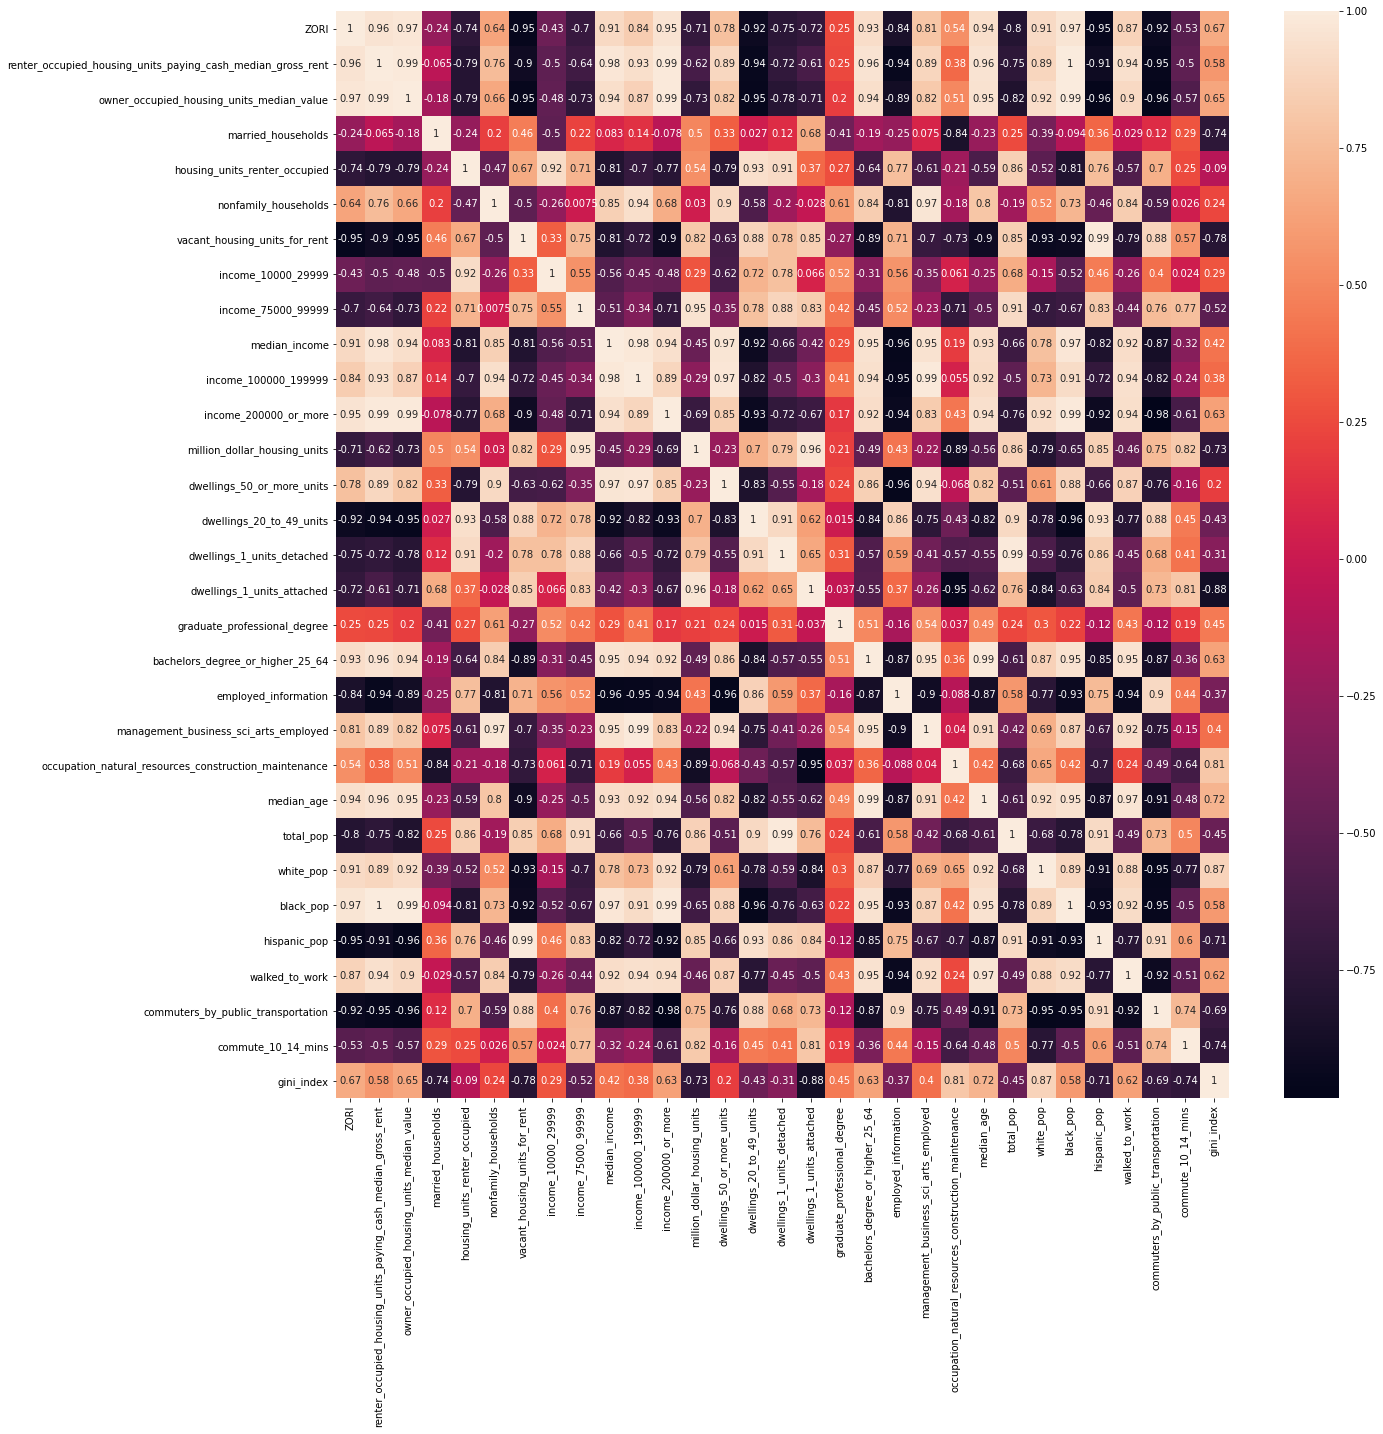

In [11]:
corr = df2.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)